In [2]:
import matplotlib.pyplot as plt
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import numpy as np
# Get the current notebook's directory
current_dir = os.path.dirname(os.path.abspath('__file__'))
# Go up one level to the project root if needed
project_root = os.path.dirname(current_dir)
# Define paths relative to those locations
res_dir = os.path.join(project_root, 'data_files')

#bootstrapped data for mean confidence scores
with open(os.path.join(res_dir, 'fig2a_3.json'), 'r') as fp:
        conf_score_dict = json.load(fp)

In [4]:
df = pd.DataFrame([
    {"Model_Prompt": key, "Loss Entropy": value} for key, value in conf_score_dict.items()
])
df['Model']= df['Model_Prompt'].str.split('_').str[0]
df['Prompt Style']= df['Model_Prompt'].str.split('_').str[1]

# formatting visualization

Duplicate key in file '/mnt/lustre/home/akata/mdani31/official_semiollm/semiollm/visualization/.matplotlibrc', line 15 ('font.sans-serif      : Arial, sans-serif')


/tmp/ipykernel_727872/4092563475.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['ZS', 'FS', 'CoT', 'FS-CoT', 'SC'])


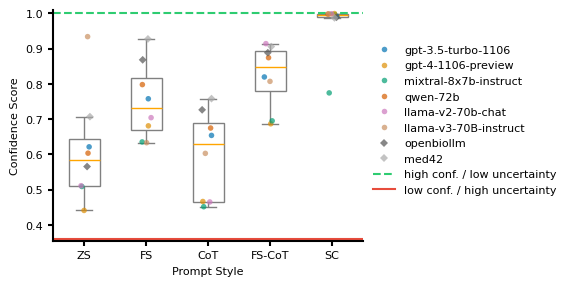

In [5]:
import logging
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)
import matplotlib.pyplot as plt
import matplotlib as mpl

format_file = os.path.join(current_dir, '.matplotlibrc')
with mpl.rc_context(fname=format_file):
    # Create the box plot
    fig, ax = plt.subplots(figsize=(4, 3))
    ax = sns.boxplot(
        x="Prompt Style", 
        y="Loss Entropy", 
        data=df, 
        showfliers=False,
        boxprops=dict(facecolor="none", edgecolor="gray"),
        whiskerprops=dict(color="gray"),
        capprops=dict(color="gray"),
        medianprops=dict(color="orange"),
        width=0.5
    )

    diamond_models = ['openbiollm', 'med42']
    sns.stripplot(
        data=df[~df['Model'].isin(diamond_models)],
        x='Prompt Style', y='Loss Entropy', hue = 'Model',
        palette='colorblind', size=4, jitter=True, alpha=0.7, marker='o', ax=ax
    )
    # Plot diamonds for openbiollm and med42
    sns.stripplot(
        data=df[df['Model'].isin(diamond_models)],
        x='Prompt Style', y='Loss Entropy', hue = 'Model',
        palette='gray', size=4, jitter=True, alpha=0.7, marker='D', ax=ax
    )

    ax.axhline(y=1.0, color='#2ecc71', linestyle='--', label='high conf. / low uncertainty')
    ax.axhline(y=0.36, color='#e74c3c', linestyle='solid', label='low conf. / high uncertainty')
    ax.set_xticklabels(['ZS', 'FS', 'CoT', 'FS-CoT', 'SC'])
    ax.set_ylabel('Confidence Score')
    ax.set_ylim(0.355, 1.01)
    # Add legend
    ax.legend(bbox_to_anchor=(1.0, 0.89), loc='upper left')
    sns.despine()
    ax.grid(False)
    plt.show()